In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
x = [
    [
        [9, -1, 2],
        [1, 8, -1],
        [3, -2, 10]
    ],
    [
        [7, 2, 1],
        [1, 6, 2],
        [2, 3, 9]
    ],
    [
        [6, 1, 2],
        [2, 7, 1],
        [3, 2, 8]
    ],
    [
        [8, 1, -2],
        [2, 9, 1],
        [1, -1, 7]
    ],
    [
        [10, 3, 1],
        [2, 7, 2],
        [3, 1, 6]
    ]
]
y = [
    [17, 15, 19],
    [12, 13, 14],
    [13, 15, 16],
    [16, 14, 13],
    [18, 16, 17]
]

def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis= 1) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol = 0.001, max_iter = 45):
    if not diagonal_dominant(x):
        print("Not Diagonal Dominant")
        return
    
    print("Diagonal Dominant")
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x[0]))

    for i in range(max_iter):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx] + np.dot(row, new_res)) / diag[idx]

        print(f"iteration {i+1} : {new_res}")

        distance = np.sqrt(np.dot(old_res - new_res, old_res -new_res))

        if distance < tol:
            print("Converged")
            print(f"Result : {new_res}")
            return new_res  
        
        old_res = new_res

    
for i in range(0,3):
    print(f"Matrix {i+1} : ")
    gauss_seidel(x[i], y[i])


Matrix 1 : 
Diagonal Dominant
iteration 1 : [1.88888889 1.63888889 1.66111111]
iteration 2 : [1.70185185 1.86990741 1.76342593]
iteration 3 : [1.70478395 1.88233025 1.76503086]
iteration 4 : [1.70580761 1.88240291 1.7647383 ]
iteration 5 : [1.7058807  1.8823572  1.76470723]
Converged
Result : [1.7058807  1.8823572  1.76470723]
Matrix 2 : 
Diagonal Dominant
iteration 1 : [1.71428571 1.88095238 0.54761905]
iteration 2 : [1.09863946 1.80102041 0.71107332]
iteration 3 : [1.09812655 1.74662114 0.72932039]
iteration 4 : [1.11106248 1.73838279 0.72919185]
iteration 5 : [1.11343465 1.73803027 0.72878221]
iteration 6 : [1.11359389 1.73814028 0.72871015]
Converged
Result : [1.11359389 1.73814028 0.72871015]
Matrix 3 : 
Diagonal Dominant
iteration 1 : [2.16666667 1.52380952 0.80654762]
iteration 2 : [1.64384921 1.55796485 0.99406533]
iteration 3 : [1.57565075 1.55066188 1.0214655 ]
iteration 4 : [1.56773452 1.54900935 1.02484722]
iteration 5 : [1.5668827  1.54876963 1.02522658]
Converged
Result :

alpha : [[1.38018433]
 [2.38479263]]


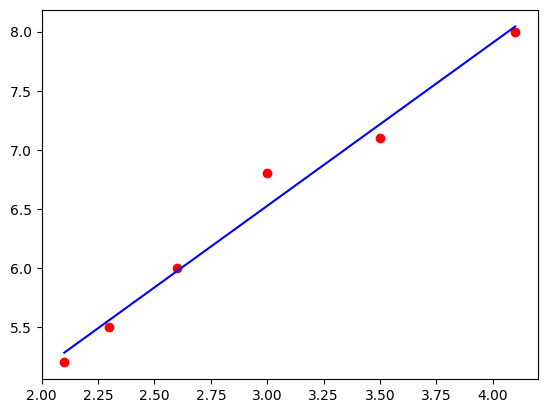

In [6]:
x = [2.1, 2.3, 2.6, 3.0, 3.5, 4.1]
y = [5.2, 5.5, 6.0, 6.8, 7.1, 8.0]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]
alpha = np.linalg.inv(np.dot(A.T, A))
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha ,Y)

print(f"alpha : {alpha}")

plt.plot(x, y, "ro")
plt.plot(x, alpha[0]*x+alpha[1], "b-")
plt.show()

In [10]:
def f(x):
    return x ** 3 + 4*(x**2) - 10

def g(x):
    return 3 * (x**2) + 8*x

def newton_raphson(x, tol= 0.005, max_iter = 20):
    found = False
    for i in range(max_iter):
        x = x - (f(x)/g(x))

        print(f"iteration {i+1} : {x}")

        if np.abs(f(x)) <tol:
            print(f"Root is found at {i+1} iteration : {x}")
            found = True
            return 
        
    if found == False:
        print("error")
        return
    
newton_raphson(1.2)

iteration 1 : 1.3804597701149426
iteration 2 : 1.3653424684632482
Root is found at 2 iteration : 1.3653424684632482


In [11]:
def f(x):
    return np.sin(x) + x**2

a = 0
b = 3.14
n = 5000

width = (b-a) / (n-1)
x = np.linspace(a,b,n)
y = f(x)

left_rieman = width * np.sum(f(x[:-1]))
right_rieman = width * np.sum(f(x[1:]))

mid = (x[:-1] + x[1:]) /2 
mid_rieman = width * np.sum(f(mid))

print(f"Left = {left_rieman}")
print(f"right = {right_rieman}")
print(f"mid = {mid_rieman}")

Left = 12.316616505214359
right = 12.322810573013951
mid = 12.319713328034231
